# Problem 1

In [31]:
import numpy as np
import math

def one_d_newton(f, x0, f_prime, tol = 1e-5, maxiter = 15):
    difference = tol + 1
    currentItr = 1
    x1=0
    while (currentItr < maxiter) and (difference > tol):
        x1 = x0 - f(x0)/f_prime(x0)
        difference = abs(x1 - x0)
        x0 = x1
        currentItr += 1
        
    if (currentItr == maxiter):
        raise ValueError("Does not converge")
    return x0

f = lambda x : np.exp(x) - 2
f_prime = lambda x : np.exp(x)

res = one_d_newton(f, 0, f_prime)
print(res)
np.allclose(f(res), 0)

0.6931471805600254


True

# Problem 2

In [6]:
def fr(r, args):
    p1, p2, n1, n2 = args
    return p1*((1+r)**n1-1) - p2*(1-(1+r)**(-n2))

def fr_prime(r, args):
    p1, p2, n1, n2 = args
    return p1*n1*(1+r)**(n1-1)-p2*n2*(1+r)**(-n2-1)

arguments = (2000, 8000, 30, 20)

gr = lambda r : fr(r, arguments)
gr_prime = lambda r:fr_prime(r, arguments)

res2 = one_d_newton(gr, 0.03, gr_prime)
print(res2)

0.038778432893950644


# Problem 3

In [19]:
def backtracking(f, x0, f_prime, tol = 1e-5, alpha = 1, maxiter = 15):
    difference = tol + 1
    currentItr = 1
    x1=0
    while (currentItr < maxiter) and (difference > tol):
        x1 = x0 - f(x0)/f_prime(x0)*alpha
        difference = abs(x1 - x0)
        x0 = x1
        currentItr += 1
    return x0

#f = lambda x : x**(1.0/3)
#f_prime = lambda x : (1.0/3) * x ** (-2.0/3)
f = lambda x : np.sign(x) * np.power(np.abs(x), 1.0/3)
f_prime = lambda x : 1/( np.power(np.abs(x), 2.0/3))/3

backtracking(f, 0.01, f_prime, alpha = 0.4)

6.400000000000125e-07

# Problem 4

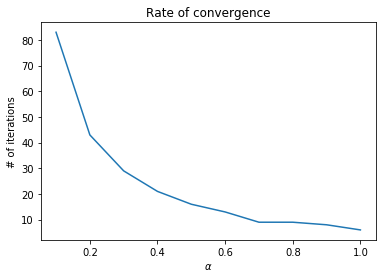

In [30]:
import matplotlib.pyplot as plt
f = lambda x : np.exp(x) - 2
f_prime = lambda x : np.exp(x)
alpha = np.linspace(0.1, 1, 10)

def backtracking_itr(f, x0, f_prime, tol = 1e-5, alpha = 1, maxiter = 100):
    difference = tol + 1
    currentItr = 1
    x1=0
    while (currentItr < maxiter) and (difference > tol):
        x1 = x0 - f(x0)/f_prime(x0)*alpha
        difference = abs(x1 - x0)
        x0 = x1
        currentItr += 1
    return currentItr

iters = np.zeros(10)
for i in range(10):
    iters[i] = backtracking_itr(f, 0, f_prime, alpha = alpha[i])
plt.plot(alpha, iters)
plt.title("Rate of convergence")
plt.xlabel(r"$\alpha$")
plt.ylabel("# of iterations")
plt.show()


# Problem 5

In [39]:
from autograd import elementwise_grad
from autograd import jacobian
from sympy.matrices import *
from autograd import grad
import autograd.numpy as anp
import sympy as sy
from sympy import lambdify
from sympy import *
import numpy.linalg as la

def nd_newton(f, Df, x0, tol = 1e-6, maxiter = 100, alpha = 1):
    difference = tol + 1
    currentItr = 1
    if np.isscalar(x0):
        x1=0 #initialize
        while (currentItr < maxiter) and (difference > tol):
            x1 = x0 - f(x0)/Df(x0)*alpha
            difference = abs(x1 - x0)
            x0 = x1
            currentItr += 1
        if (currentItr == maxiter):
            raise ValueError("Does not converge")
        return x0
    else:
        n = x0.shape
        while (currentItr < maxiter) and (difference > tol):
            x1 = x0 - alpha * la.inv(Df(x0)) @ f(x0)
            difference = la.norm(x1 - x0)
            x0 = x1
            currentItr += 1
        if (currentItr == maxiter):
            raise ValueError("Does not converge")
        return x0
    
def Df(x_vec):
    x, y = sy.symbols("x y")
    func1_sy = exp(x)*sin(y) + y**3
    func2_sy = 3*y - cos(x)
    func_sy = Matrix([func1_sy, func2_sy])
    jac_sy = func_sy.jacobian([x,y])
    jac_func = lambdify((x,y), jac_sy)
    return jac_func(x_vec[0], x_vec[1])

def f(x_vec):
    x, y = x_vec
    return np.array([np.exp(x)*np.sin(y)+y**3, 3*y-np.cos(x)])

ans = nd_newton(f, Df, np.array([1,1]))
np.allclose(f(ans), np.array([0,0]))

True

# Problem 6

In [58]:
def fun(x_vec):
    x, y = x_vec
    gamma = 5
    delta = 1
    a1 = gamma * x * y - x * (1+y)
    a2 = -x*y + (delta - y)*(1+y)
    return np.array([a1, a2])

def Dfun(x_vec):
    x, y = sy.symbols("x y")
    gamma = 5
    delta = 1
    func1_sy = gamma * x * y - x * (1+y)
    func2_sy = -x*y + (delta - y)*(1+y)
    func_sy = Matrix([func1_sy, func2_sy])
    jac_sy = func_sy.jacobian([x,y])
    jac_func = lambdify((x,y), jac_sy)
    
    return jac_func(x_vec[0], x_vec[1])
 


print(nd_newton(fun, Dfun, np.array([-0.15, 0.15]), alpha = 1))
print("This is sufficiently close to 0, -1")

[-7.16963966e-21 -1.00000000e+00]
This is sufficiently close to 0, -1


# Problem 7

/Users/Zeshun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/Users/Zeshun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


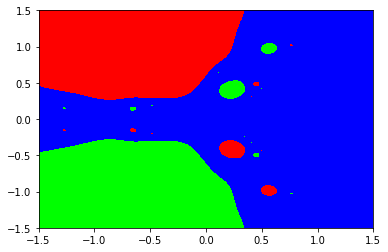

In [95]:
def newton_iters(f, f_prime, x0, iters):
    currentItr = 1
    while currentItr <= iters:
        x1 = x0 - f(x0)/f_prime(x0)
        x0 = x1
        currentItr += 1
    return x1

def basins(f, f_prime, zeros, bounds, res, iters):
    r_min, r_max, i_min, i_max = bounds
    x_real = np.linspace(r_min, r_max, res)
    x_imag = np.linspace(i_min, i_max, res)
    X_real, X_imag = np.meshgrid(x_real, x_imag)
    X0 = X_real + 1j*X_imag
    Xk = np.zeros_like(X0)
    Xk = newton_iters(f, f_prime, X0, iters)
    
    Y = get_Y(Xk, zeros)
    
    plt.pcolormesh(x_real, x_imag, Y, cmap = "brg")
    #return Xk
    
    
bounds = [-1.5,1.5,-1.5,1.5]
f = lambda x:x**3 -1
f_prime = lambda x : 3 * x**2

zeros = np.array([1, -0.5+1j*math.sqrt(3)/2, -0.5-1j*math.sqrt(3)/2])




basins(f, f_prime, zeros, bounds, 901, 6)


def get_Y(Xk, zeros):
    m, n = Xk.shape
    Y = np.zeros((m,n))
    for z in range(len(zeros)):
        for i in range(m):
            for j in range(n):
                if np.allclose(Xk[i,j], zeros[z]):
                    Y[i,j] = int(z)
    return Y

#get_Y(xk, zeros)
#print(np.allclose(xk[0,1], 1))